# Create a Headline
Create a new cell.  
Put the cursor in the new cell.  
Press Esc key.   
Press m key.  
Write your comment.  
Press shift+Enter keys. 


# Load MNIST Data


In [149]:
from keras.datasets import mnist

In [150]:
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()

# MNIST Data Format

In [152]:
print(train_images.shape)
print(len(train_images))
print(train_images.ndim)

(60000, 28, 28)
60000
3


In [88]:
#test_images[0]

In [153]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [154]:
print('test_images.shape:{}'.format(train_images.shape))
print(test_images.shape)
print('len(test_images):{}'.format(len(test_images)))
print('test_labels.ndim:{}'.format(test_images.ndim))

test_images.shape:(60000, 28, 28)
(10000, 28, 28)
len(test_images):10000
test_labels.ndim:3


In [155]:
#print('test_image_sample  {}'.format(test_images[0]))
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#  Plot the Digits

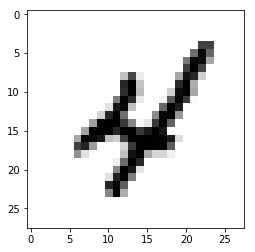

[5 0 4 1 9 2 1 3 1 4]


In [156]:
digit = train_images[9]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(train_labels[0:10])

#  Manipulate the Data

In [157]:
slice_images = train_images[0:10]
print("")
slice_labels = train_labels[0:10]
print('slice_images.shape: {}'.format(slice_images.shape))
print('slice_images.ndim {}'.format(slice_images.ndim))

print("")
print('Slice 2')
#Part of image from row 14 to 27 and column 14 to 27
slice2_images = slice_images[:, 14:, 14:]
print('slice2_images.shape: {}'.format(slice2_images.shape))
print('slice2_images.ndim {}'.format(slice2_images.ndim))
print('')
#Part of image from row 14 to 27 and column 14 to 27
print('Slice 3')
slice3_images = slice_images[:, 7:-7, 7:-7]
print('slice3_images.shape: {}'.format(slice3_images.shape))
print('slice3_images.ndim {}'.format(slice3_images.ndim))


slice_images.shape: (10, 28, 28)
slice_images.ndim 3

Slice 2
slice2_images.shape: (10, 14, 14)
slice2_images.ndim 3

Slice 3
slice3_images.shape: (10, 14, 14)
slice3_images.ndim 3


# Prepare the Images

In [158]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Prepare the Labels

In [159]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# The Network Architecture

In [160]:
from keras import models
from keras import layers
network = models.Sequential() # Specify layers in their sequential order
# inputs are vectors in R^28*28 = R^784
# Dense = Fully Connected.  
# Hidden layer has 512 neurons with ReLU activations.
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) # sigmoid 
# Ouput layer uses softmax with 10 ouput neurons
# Assume there are 512 neurons going into the output layer
network.add(layers.Dense(10, activation='softmax')) # sigmoid relu

# Compile the Network

In [161]:
network.compile(optimizer = 'rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
# Options for  optimizer = 'adam', 'sgd'
# Other Options loss = 'mean_squared_error'

# Train the Network

In [162]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)
#  "fit" refers to fitting the network weights to the data

Epoch 1/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.2562 - acc: 0.9248
Epoch 2/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.1032 - acc: 0.9700
Epoch 3/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.0679 - acc: 0.9796
Epoch 4/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0493 - acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.0376 - acc: 0.9891
